In [36]:
import numpy as np
import random
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress 

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
lats = np.random.uniform(-90 , 90 , size = 1500)

long = np.random.uniform(-180 , 180 , size = 1500)

lat_langs = zip(lats , long)

lat_langs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_langs)

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [8]:
# Create an empty list to hold the cities 

cities = []

# Identify the nearest city for each lat and lang combination 

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0] , coordinate[1]).city_name

    #If the the city is unique, then add it to the list of citites 

    if city not in cities:

        cities.append(city)

# Print the city count 

len(cities)

617

In [9]:
# Import the request library 

import requests

# Import API key 

from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [ ]:
# Create an end point URL for a city 

city_url = url + '&q=' + 'Boston'

#print(city_url)

In [12]:
city_url = url + '&q=' + 'Boston'

city_weather = requests.get(city_url)

city_weather

<Response [200]>

In [ ]:
city_weather.json()

In [14]:
# Handeling errors and seeing if our weather data was found
city_url = url + '&q=' + 'Boston'

city_weather = requests.get(city_url)

if city_weather.status_code == 200:

    print(f'City Weather Was Found')

else:

    print(f'City Weather Was Not Found')


City Weather Was Found


In [15]:
boston_data = city_weather.json()

boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1650534822,
 'sunset': 1650583907}

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 63.39 41 75 16.11


In [17]:
# Changing the time time stamp out put to ISO 

from datetime import datetime

date = boston_data['dt']

# Converting the UTC date to a date format with year, month, day, hours, minutes, and seconds.

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-04-21 15:49:28'

In [ ]:
import time

from datetime import datetime

from citipy import citipy

city_data = []

# Begining of logging 

print('Beginning Data Retriveal      ')

print('------------------------------')

# Counters NOTE: initialized the counters at 1 
# because we want the first iteration of the logging for each recorded response and the set to start at 1.

record_count = 1

set_count = 1 

# Looping through the citites 

for i, city in enumerate(cities):

    # Groupping cities in sets of 50 

    if (i % 50 == 0 and i >= 50):

        set_count += 1 

        record_count = 1 

        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


    

In [37]:
import pandas as pd 

# Converting dictionaries into a data frame 

city_data_df = pd.DataFrame(city_data)

new_column_order = ['City' , 'Country' , 'Date' , 'Lat' , 'Lng' , 'Max Temp' , 'Humidity' , 'Cloudiness' , 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-04-21 15:41:57,42.6001,-73.9662,56.03,43,100,3.00
1,Port Alfred,ZA,2022-04-21 15:42:45,-33.5906,26.8910,77.18,52,70,2.84
2,Ushuaia,AR,2022-04-21 15:50:44,-54.8000,-68.3000,44.22,65,75,17.27
3,Yellowknife,CA,2022-04-21 15:52:14,62.4560,-114.3525,19.92,53,20,4.61
4,Busselton,AU,2022-04-21 15:42:41,-33.6500,115.3333,59.27,62,0,15.23
5,Mataura,NZ,2022-04-21 15:52:39,-46.1927,168.8643,47.48,98,100,5.70
6,Padang,ID,2022-04-21 15:52:39,-0.9492,100.3543,78.84,83,94,2.77
7,Broome,US,2022-04-21 15:52:39,42.2506,-75.8330,56.70,53,100,15.01
8,Longyearbyen,SJ,2022-04-21 15:52:40,78.2186,15.6401,31.84,69,40,0.00
9,Luderitz,NA,2022-04-21 15:52:40,-26.6481,15.1594,66.34,70,1,9.10


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

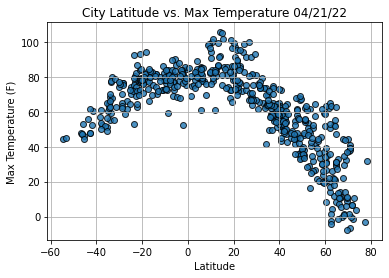

In [31]:
# Extracting relevant fields from the Dataframe

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

today = time.strftime("%x")

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot 
#plt.show()

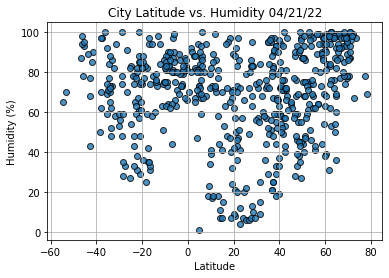

In [32]:
# Plot for humidity 

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#plt.show()

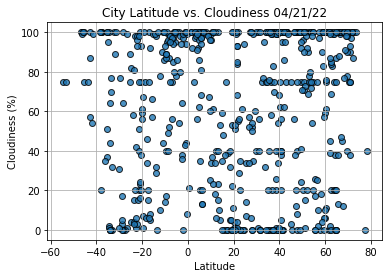

In [33]:
# Plot for cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#plt.show()

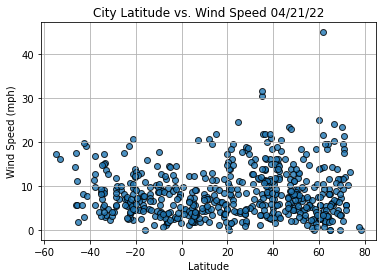

In [34]:
# Plot for windspeed 

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
index13 = city_data_df.loc[13]
index13

City                       Golden
Country                        US
Date          2022-04-21 15:49:57
Lat                       39.7555
Lng                     -105.2211
Max Temp                    65.21
Humidity                       37
Cloudiness                     40
Wind Speed                   5.01
Name: 13, dtype: object

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-04-21 15:41:57,42.6001,-73.9662,56.03,43,100,3.00
3,Yellowknife,CA,2022-04-21 15:52:14,62.4560,-114.3525,19.92,53,20,4.61
7,Broome,US,2022-04-21 15:52:39,42.2506,-75.8330,56.70,53,100,15.01
8,Longyearbyen,SJ,2022-04-21 15:52:40,78.2186,15.6401,31.84,69,40,0.00
11,Nemuro,JP,2022-04-21 15:52:08,43.3236,145.5750,42.75,97,100,17.94


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

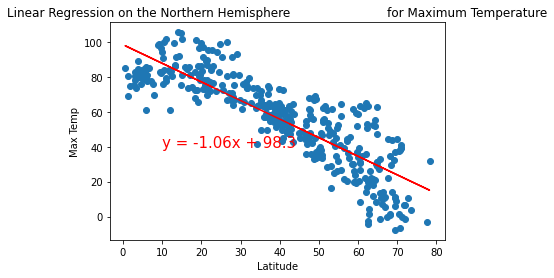

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

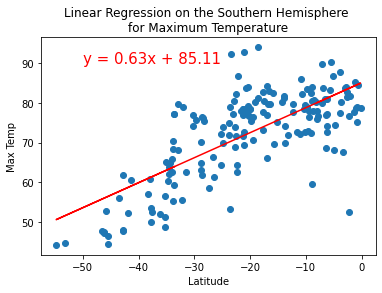

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

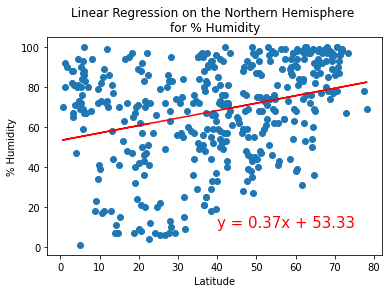

In [47]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

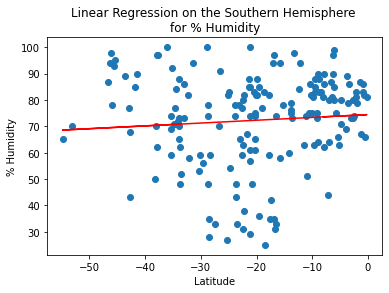

In [48]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

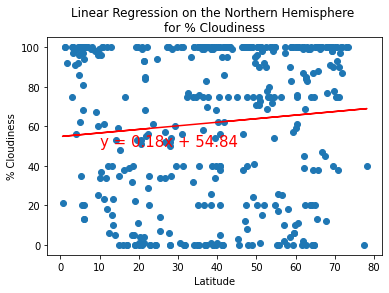

In [51]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(10,50))

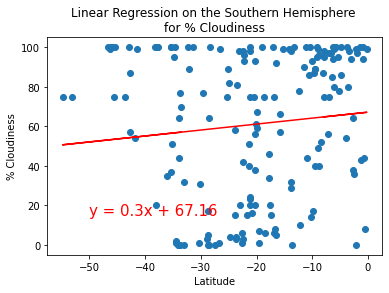

In [52]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,15))

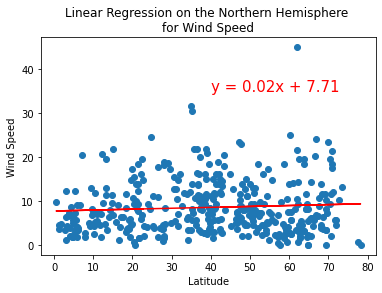

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

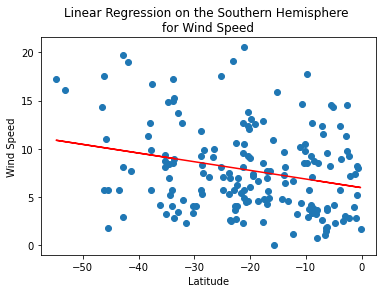

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))